In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile as zf
import imutils
import cv2
import dlib
import random
import tensorflow as tf

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,AveragePooling2D,Flatten,Dropout,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

from sklearn.utils import shuffle
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

from imutils import build_montages
from google.colab.patches import cv2_imshow

sns.set()

In [0]:
filepath_prototxt = '/content/deploy.prototxt.txt'
filepath_model = '/content/res10_300x300_ssd_iter_140000.caffemodel'

In [45]:
os.getcwd()

'/content'

In [0]:
handle_test=zf.ZipFile(r'/content/test.zip')
handle_test.extractall('/content/Testing')
handle_test.close()


handle_train=zf.ZipFile(r'/content/train.zip')
handle_train.extractall('/content/Training')
handle_train.close()



In [0]:
train_mask = os.listdir('/content/Training/train/train_with_mask/')
train_nomask = os.listdir('/content/Training/train/train_without_mask/')

test_mask = os.listdir('/content/Testing/test/test_with_mask/')
test_nomask = os.listdir('/content/Testing/test/test_without_mask/')


In [0]:
filepath_train_mask = '/content/Training/train/train_with_mask/'
filepath_train_nomask = '/content/Training/train/train_without_mask/'

filepath_test_mask = '/content/Testing/test/test_with_mask/'
filepath_test_nomask = '/content/Testing/test/test_without_mask/'


In [0]:
train_images = []
test_images = []
outputs = []

labels=[]
test_labels=[]

for i in train_mask:
  image = cv2.imread(filepath_train_mask+i)
  image = cv2.resize(image , (224,224))
  train_images.append(image)
  labels.append(1)

for i in train_nomask:
  image = cv2.imread(filepath_train_nomask+i)
  image = cv2.resize(image , (224,224))
  train_images.append(image)
  labels.append(0)

for i in test_mask:
  image = cv2.imread(filepath_test_mask+i)
  outputs.append(image)
  image = cv2.resize(image , (224,224))
  test_images.append(image)
  test_labels.append(1)

for i in test_nomask:
  image = cv2.imread(filepath_test_nomask+i)
  outputs.append(image)
  image = cv2.resize(image , (224,224))
  test_images.append(image)
  test_labels.append(0)



In [50]:
train_images[0].shape

(224, 224, 3)

In [51]:
test_images[0].shape

(224, 224, 3)

In [0]:
train_images = np.array(train_images , dtype="float") / 255.0
test_images = np.array(test_images , dtype="float") / 255.0
labels = np.array(labels)

In [53]:
train_images.shape

(1250, 224, 224, 3)

In [54]:
test_images.shape

(194, 224, 224, 3)

In [0]:
(trainX , testX , trainY , testY) = train_test_split(train_images , labels, train_size=0.80 , test_size=0.20 , random_state=42) 

In [56]:
print(type(trainX))
print(trainX.shape)
print(type(trainY))
print(trainY.shape)
print(type(testX))
print(testX.shape)
print(type(testY))
print(testY.shape)

<class 'numpy.ndarray'>
(1000, 224, 224, 3)
<class 'numpy.ndarray'>
(1000,)
<class 'numpy.ndarray'>
(250, 224, 224, 3)
<class 'numpy.ndarray'>
(250,)


In [57]:
trainY

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,

In [0]:
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

In [59]:
trainY
# 1 0 is nomask
# 0 1 is mask

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [60]:
aug=ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

baseModel=MobileNetV2(weights="imagenet",include_top=False,
      input_tensor=tf.keras.layers.Input(shape=(224,224,3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = False

In [61]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

In [0]:
model.compile(loss='binary_crossentropy', optimizer=opt , metrics=["accuracy"])

In [64]:
H = model.fit(aug.flow(trainX,trainY,batch_size=BS) , epochs=EPOCHS ,
              steps_per_epoch=len(trainX) // BS,
              validation_data=(testX,testY),
              validation_steps=len(testX) // BS)

Epoch 1/20
31/31 [==============================] - 10s 322ms/step - loss: 0.5985 - accuracy: 0.7025 - val_loss: 0.1704 - val_accuracy: 0.9840
Epoch 2/20
31/31 [==============================] - 9s 294ms/step - loss: 0.2114 - accuracy: 0.9298 - val_loss: 0.0704 - val_accuracy: 1.0000
Epoch 3/20
31/31 [==============================] - 9s 295ms/step - loss: 0.1327 - accuracy: 0.9556 - val_loss: 0.0419 - val_accuracy: 1.0000
Epoch 4/20
31/31 [==============================] - 9s 295ms/step - loss: 0.0956 - accuracy: 0.9669 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 5/20
31/31 [==============================] - 9s 295ms/step - loss: 0.0773 - accuracy: 0.9742 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 6/20
31/31 [==============================] - 9s 293ms/step - loss: 0.0597 - accuracy: 0.9783 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 7/20
31/31 [==============================] - 9s 295ms/step - loss: 0.0473 - accuracy: 0.9855 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch

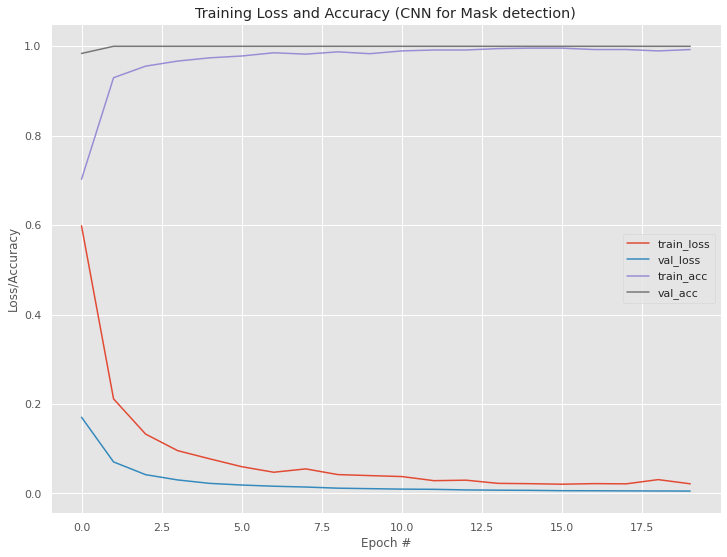

In [65]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(12,9))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (CNN for Mask detection)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [66]:
preds = model.predict(test_images)
preds

array([[2.44267489e-04, 9.99755681e-01],
       [5.02935378e-04, 9.99497056e-01],
       [3.50926362e-04, 9.99649048e-01],
       [8.06880370e-03, 9.91931140e-01],
       [1.78540926e-04, 9.99821484e-01],
       [3.33283504e-04, 9.99666691e-01],
       [8.18644010e-04, 9.99181330e-01],
       [3.16585356e-04, 9.99683380e-01],
       [6.11547075e-05, 9.99938846e-01],
       [4.10221575e-04, 9.99589741e-01],
       [1.83931983e-03, 9.98160660e-01],
       [5.79921994e-04, 9.99420047e-01],
       [1.17742402e-05, 9.99988198e-01],
       [9.49234964e-05, 9.99905109e-01],
       [1.49376029e-02, 9.85062361e-01],
       [9.86584273e-05, 9.99901295e-01],
       [3.57915938e-04, 9.99642134e-01],
       [3.70655653e-06, 9.99996305e-01],
       [9.94062982e-04, 9.99005973e-01],
       [7.99582340e-03, 9.92004216e-01],
       [7.53365806e-04, 9.99246716e-01],
       [8.48526106e-05, 9.99915123e-01],
       [5.34179446e-04, 9.99465883e-01],
       [4.09717113e-03, 9.95902836e-01],
       [2.344014

In [0]:
#useful indexes -> 93,106,9,89,123,151,53,84
# check index -> 85 , 54 ,53

In [0]:
conf = 0.00
no_conf = 1.99

In [0]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

In [0]:
net = cv2.dnn.readNetFromCaffe(filepath_prototxt ,filepath_model)

In [84]:
vs = cv2.VideoCapture('/content/People wearing masks in public - YouTube (360p).mp4')
writer = None
(W, H) = (None, None)

while True:
  (grabbed, frame) = vs.read()
  blob = cv2.dnn.blobFromImage(cv2.resize(frame,(300,300)), 1.0 ,(300,300) ,(104.0, 177.0, 123.0))
  net.setInput(blob)
  detections = net.forward()
  
  if not grabbed:
    break

  if W is None or H is None:
    (H,W) = frame.shape[:2]

  output = frame.copy()

  for i2 in range(0,detections.shape[2]):
    confidence = detections[0,0,i2,2]

    if (confidence > conf ) and (confidence < no_conf):
      box = detections[0,0,i2,3:7]*np.array([W,H,W,H])
      (startX , startY , endX , endY) = box.astype("int")
      (startX,startY) = (max(0,startX),max(0,startY))
      (endX,endY) = min(W-1,endX) , min(H-1,endY)
      
      face = frame[startY:endY,startX:endX]
      face = cv2.cvtColor(face , cv2.COLOR_BGR2RGB)
      face = cv2.resize(face , (224,224))
      face = img_to_array(face)
      face = preprocess_input(face)
      face = np.expand_dims(face,axis=0)

      (mask,withoutMask) = model.predict(face)[0]

      if mask < withoutMask:
        label="NoMask"
        color=(0,0,255)

      else:
        label="Mask"
        color=(0,255,0)

      label = "{}: {:.2f}%".format(label,max(mask,withoutMask)*100)

      cv2.rectangle(output , (startX,startY), (endX,endY), color , 2)
      cv2.putText(output , label , (startX , startY) , cv2.FONT_HERSHEY_SIMPLEX , 0.45 , (255,255,255), 2)

  if writer is None:
    fourcc = cv2.VideoWriter_fourcc(*"MJPG")
    writer = cv2.VideoWriter('/content/mask_output3.avi',fourcc,30,(W,H),True)

  writer.write(output)

  cv2_imshow(output)
  key = cv2.waitKey(1) & 0xFF

  if key == ord("q"):
    break

writer.release()
vs.release()

error: ignored